In [23]:
import pandas as pd

df = pd.read_csv("C:\\Users\\sweta\\Desktop\\Python\\Air Quality Analysis-20250722T143602Z-1-001\\Air Quality Analysis\\delhiaqi.csv.csv")
df.head()





,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


**data cleaning:**

In [32]:
df.dropna(inplace=True)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df.info

<bound method DataFrame.info of                    date       co     no    no2     o3     so2   pm2_5    pm10  \
0   2023-01-01 00:00:00  1655.58   1.66  39.41   5.90   17.88  169.29  194.64   
1   2023-01-01 01:00:00  1869.20   6.82  42.16   1.99   22.17  182.84  211.08   
2   2023-01-01 02:00:00  2510.07  27.72  43.87   0.02   30.04  220.25  260.68   
3   2023-01-01 03:00:00  3150.94  55.43  44.55   0.85   35.76  252.90  304.12   
4   2023-01-01 04:00:00  3471.37  68.84  45.24   5.45   39.10  266.36  322.80   
..                  ...      ...    ...    ...    ...     ...     ...     ...   
556 2023-01-24 04:00:00  1762.39   4.64  37.01  33.26   30.52  231.15  289.84   
557 2023-01-24 05:00:00  1735.69   6.82  34.96  46.49   34.33  225.08  280.52   
558 2023-01-24 06:00:00  1922.61   8.16  40.10  56.51   43.39  242.49  296.07   
559 2023-01-24 07:00:00  1361.85   9.05  52.78  71.53  100.14  165.67  191.82   
560 2023-01-24 08:00:00  1134.87   8.61  56.89  80.11  110.63  123.76  140.26

In [26]:
df.columns


Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')

In [47]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month
print(df[['date', 'month']].head(20))


[1]
2023-01-01 00:00:00 2023-01-24 08:00:00


In [48]:
print(df['month'].unique())  # This should show [1, 2, ..., 12]
print(df['date'].min(), df['date'].max())

[1]
2023-01-01 00:00:00 2023-01-24 08:00:00


In [54]:
pollutants = ['pm2_5', 'pm10', 'no', 'no2', 'co', 'so2', 'o3', 'nh3']
df_clean = df.dropna(subset=pollutants)
df_clean.shape

(561, 12)

In [49]:
df['month'].unique()

array([1])

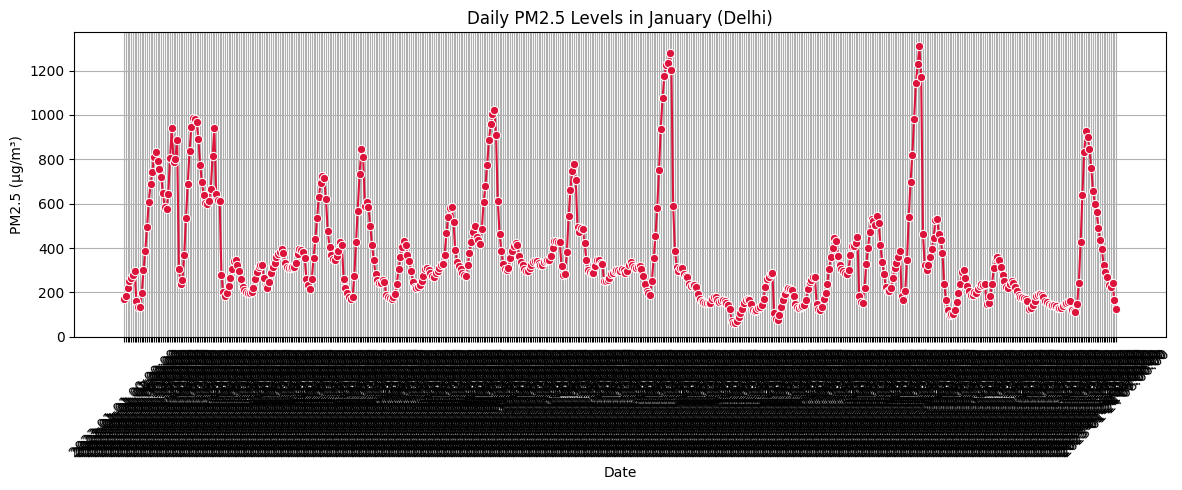

In [17]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='pm2_5', data=df_clean, marker='o', color='crimson')
plt.title("Daily PM2.5 Levels in January (Delhi)")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

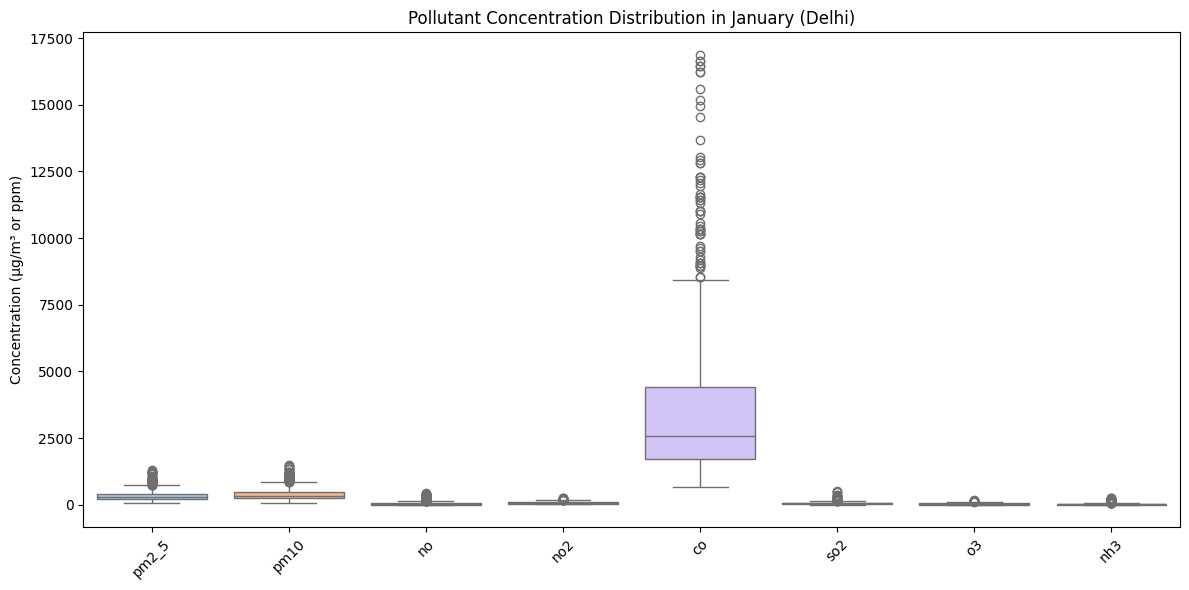

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[pollutants], palette="pastel")
plt.title("Pollutant Concentration Distribution in January (Delhi)")
plt.ylabel("Concentration (µg/m³ or ppm)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\sweta\AppData\Local\Temp\ipykernel_26516\1764695768.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pollution.index, y=avg_pollution.values, palette='flare')


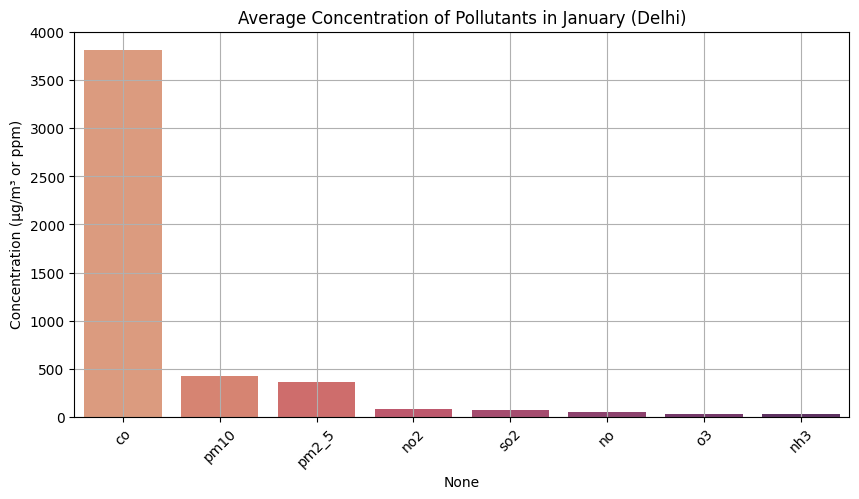

In [16]:
import pandas as pd

# Load your data
df = pd.read_csv("C:\\Users\\sweta\\Desktop\\Python\\Air Quality Analysis-20250722T143602Z-1-001\\Air Quality Analysis\\delhiaqi.csv.csv")

df_clean = df.dropna()

pollutants = ['pm2_5', 'pm10', 'no', 'no2', 'co', 'so2', 'o3', 'nh3']
avg_pollution = df_clean[pollutants].mean().sort_values(ascending=False)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_pollution.index, y=avg_pollution.values, palette='flare')
plt.title("Average Concentration of Pollutants in January (Delhi)")
plt.ylabel("Concentration (µg/m³ or ppm)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:\\Users\\sweta\\Desktop\\Python\\Air Quality Analysis-20250722T143602Z-1-001\\Air Quality Analysis\\delhiaqi.csv.csv")


df['date'] = pd.to_datetime(df['date'])
df['Day'] = df['date'].dt.day

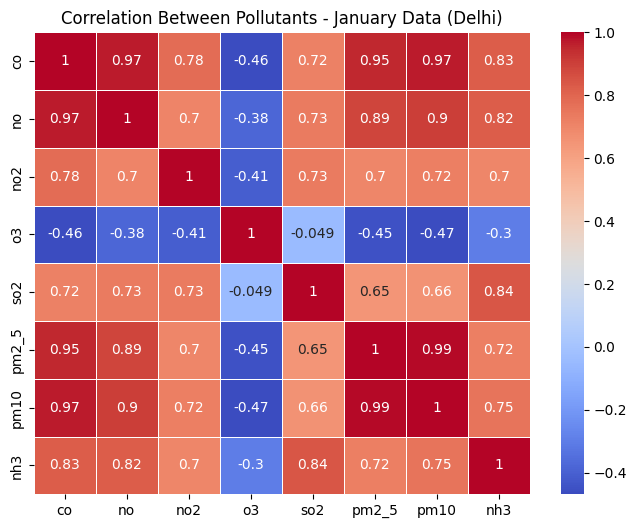

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
corr_matrix = df[pollutants].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Pollutants - January Data (Delhi)')
plt.show()

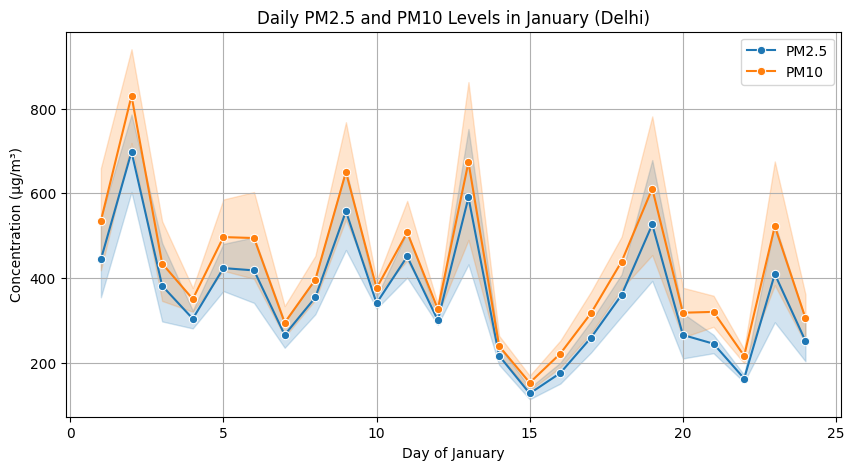

In [6]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Day', y='pm2_5', data=df, marker='o', label='PM2.5')
sns.lineplot(x='Day', y='pm10', data=df, marker='o', label='PM10')
plt.title("Daily PM2.5 and PM10 Levels in January (Delhi)")
plt.xlabel("Day of January")
plt.ylabel("Concentration (µg/m³)")
plt.legend()
plt.grid(True)
plt.show()

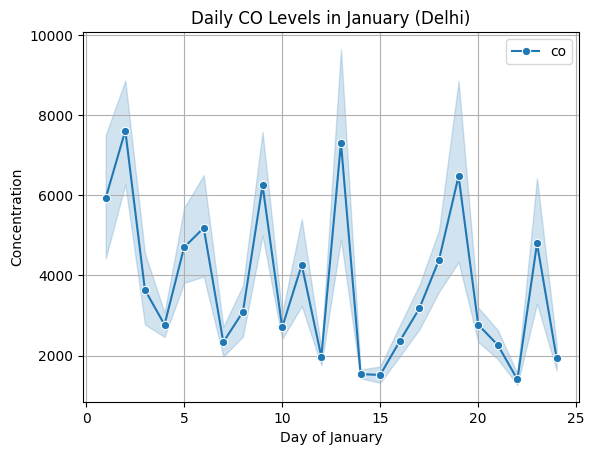

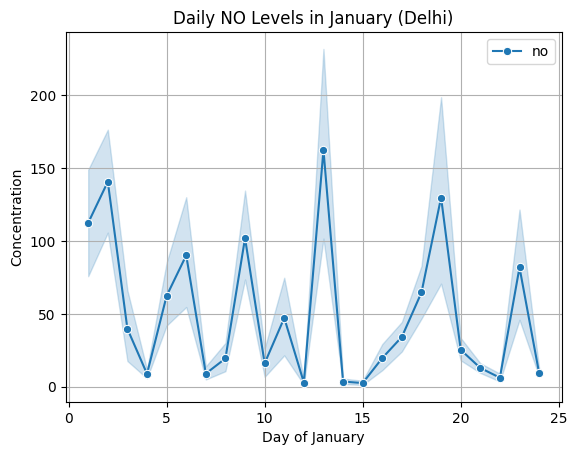

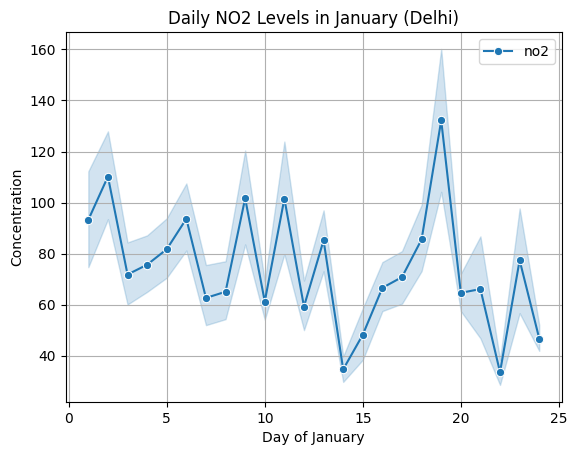

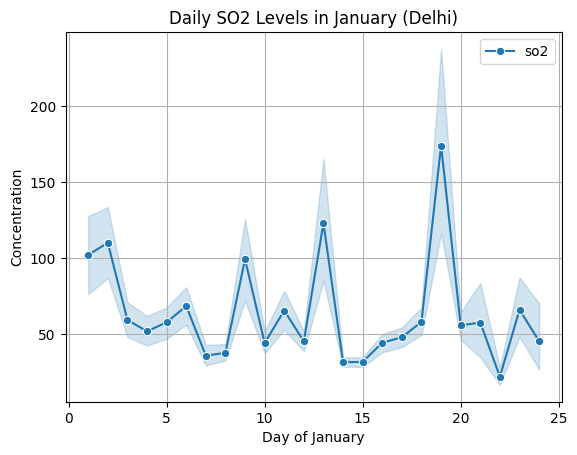

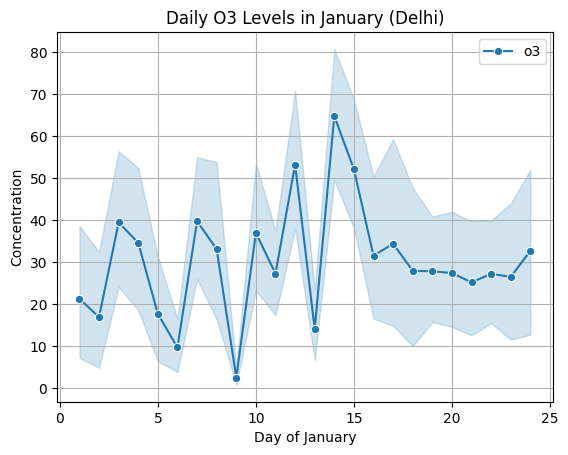

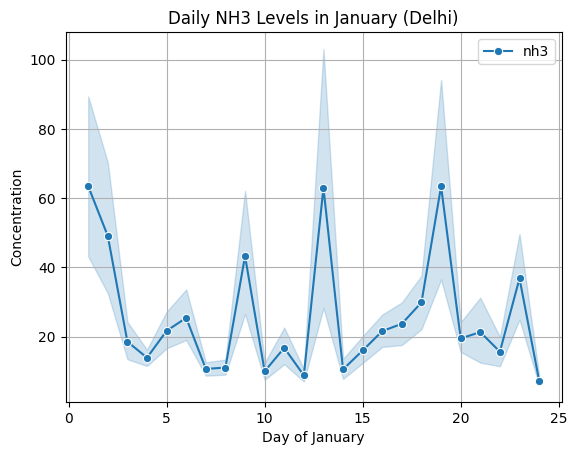

In [7]:
for pollutant in ['co', 'no', 'no2', 'so2', 'o3', 'nh3']:
    sns.lineplot(x='Day', y=pollutant, data=df, marker='o', label=pollutant)
    plt.title(f"Daily {pollutant.upper()} Levels in January (Delhi)")
    plt.xlabel("Day of January")
    plt.ylabel("Concentration")
    plt.grid(True)
    plt.show()

C:\Users\sweta\AppData\Local\Temp\ipykernel_26516\1239477640.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aqi_counts.index, y=aqi_counts.values, palette='Set2')


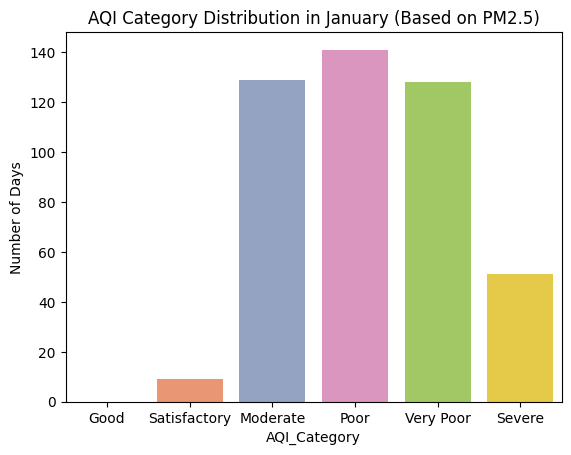

In [8]:
# Categorize AQI based on PM2.5 (India's CPCB standards)
df['AQI_Category'] = pd.cut(
    df['pm2_5'],
    bins=[0, 50, 100, 200, 300, 400, 500],
    labels=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']
)

# Count of each AQI Category
aqi_counts = df['AQI_Category'].value_counts().sort_index()
sns.barplot(x=aqi_counts.index, y=aqi_counts.values, palette='Set2')
plt.title("AQI Category Distribution in January (Based on PM2.5)")
plt.ylabel("Number of Days")
plt.show()

**Insights drawn:**
Very high spread and presence of many extreme outliers, reaching values beyond 16,000 units.
Both PM2.5 and PM10 show elevated median levels and multiple outliers.
Median values are relatively low, but some sharp spikes (outliers) .
These pollutants have lower base concentrations, though a few outlier.
Carbon Monoxide (CO) and Particulate Matter (PM2.5, PM10) are the most variable and problematic pollutants in January.

**strategies for air quality improvement and public health initiatives in the region:**
Promote electric vehicles (EVs) and expand EV charging stations.
Strictly monitor and control industrial emissions.
Use anti-smog guns, water sprinklers, and dust barriers at construction sites.
Develop urban forests and plant trees along roads, schools, and parks.
Distribute N95 masks and air purifiers in schools, hospitals, and elderly homes.
Run public awareness campaigns on air pollution and personal safety.
Stock essential medicines like inhalers, antihistamines, and nebulizers in public health centers.
